In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sentence_transformers import SentenceTransformer

In [3]:
df = pd.read_csv("df_sep_label_.csv")

In [4]:
df.shape

(3204, 6)

In [5]:
df.sample(5)

,sentiment,Классификация по ОКПД2_x,Наименование закупки_x,Реестровый номер закупки,Закупки по,Дата размещения
2725,Не подходит,62.09.20.120: Услуги по установке программного...,Право использования (1С:Зарплата и управление ...,№32312724917,223-ФЗ,31.08.2023
1229,Не подходит,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по предоставлению сертификатов ...,№0275200000123000076,44-ФЗ,27.09.2023
620,Не подходит,62.02.20.190: Услуги консультативные в области...,оказание консультационных услуг и технической ...,№0321300054623000377,44-ФЗ,12.09.2023
837,Не подходит,63.99.10.190: Услуги информационные автоматизи...,Оказание услуг по адаптации и сопровождению эк...,№0137300016923000046,44-ФЗ,24.08.2023
397,Не подходит,62.02.30.000: Услуги по технической поддержке ...,Информационные услуги с использованием экземпл...,№32312807190,223-ФЗ,28.09.2023


In [6]:
df.loc[df['sentiment'].isin(['Не подходит', 'Скорее нет', 'Затрудняюсь']), 'sentiment'] = 0
df.loc[df['sentiment'].isin(['Подходит', 'Скорее да']), 'sentiment'] = 1

In [7]:
df

,sentiment,Классификация по ОКПД2_x,Наименование закупки_x,Реестровый номер закупки,Закупки по,Дата размещения
0,0,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44-ФЗ,04.09.2023
1,1,62.09.20.190: Услуги по технической поддержке ...,оказание услуг по обслуживанию и сопровождени...,№0304300010623000024,44-ФЗ,21.09.2023
2,0,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44-ФЗ,07.09.2023
3,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44-ФЗ,18.09.2023
4,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44-ФЗ,21.08.2023
...,...,...,...,...,...,...
3199,0,62.02.30.000: Услуги по технической поддержке ...,"Оказание услуг по восстановлению, обновлению п...",№32312635470,223-ФЗ,01.08.2023
3200,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по обслуживанию программы 1С:Бу...,№32312635242,223-ФЗ,01.08.2023
3201,0,62.03.12.130: Услуги по сопровождению компьюте...,Услуги по адаптации и сопровождению экземпляро...,№32312634646,223-ФЗ,01.08.2023
3202,0,62.09.2: Услуги в области информационных техно...,Предоставление права использования программы д...,№32312634315,223-ФЗ,01.08.2023


In [8]:
sent_transformer = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

In [9]:
df.dropna(subset=['sentiment'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
embeddings = sent_transformer.encode(df['Наименование закупки_x'],
                                     show_progress_bar=True)

Batches:   0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
df['sentiment'] = df['sentiment'].astype(int)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(embeddings, 
                                                  df['sentiment'],
                                                  random_state=42,
                                                  stratify=df['sentiment'])

In [13]:
lr = LogisticRegression(random_state=42,
                           class_weight='balanced')

cb = CatBoostClassifier(random_seed=42, 
                        early_stopping_rounds=15,
                        auto_class_weights='Balanced',
                        depth=7)

In [14]:
lr.fit(X_train, y_train)
cb.fit(X_train, y_train, eval_set=(X_val, y_val))

Learning rate set to 0.039294
0:	learn: 0.6561389	test: 0.6654788	best: 0.6654788 (0)	total: 247ms	remaining: 4m 6s
1:	learn: 0.6213789	test: 0.6419770	best: 0.6419770 (1)	total: 374ms	remaining: 3m 6s
2:	learn: 0.5969168	test: 0.6235941	best: 0.6235941 (2)	total: 492ms	remaining: 2m 43s
3:	learn: 0.5682428	test: 0.5985008	best: 0.5985008 (3)	total: 614ms	remaining: 2m 32s
4:	learn: 0.5356059	test: 0.5696660	best: 0.5696660 (4)	total: 789ms	remaining: 2m 37s
5:	learn: 0.5093822	test: 0.5514340	best: 0.5514340 (5)	total: 921ms	remaining: 2m 32s
6:	learn: 0.4855370	test: 0.5316947	best: 0.5316947 (6)	total: 1.05s	remaining: 2m 28s
7:	learn: 0.4652999	test: 0.5195532	best: 0.5195532 (7)	total: 1.16s	remaining: 2m 23s
8:	learn: 0.4450752	test: 0.5087194	best: 0.5087194 (8)	total: 1.25s	remaining: 2m 18s
9:	learn: 0.4268978	test: 0.4983650	best: 0.4983650 (9)	total: 1.35s	remaining: 2m 13s
10:	learn: 0.4143238	test: 0.4904973	best: 0.4904973 (10)	total: 1.45s	remaining: 2m 10s
11:	learn: 0.

In [15]:
print(m.classification_report(y_val, lr.predict(X_val)))
print("*"*100)
print(m.roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1]))
print("*"*100)
print((m.confusion_matrix(y_val, lr.predict(X_val))))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       737
           1       0.46      0.80      0.58        60

    accuracy                           0.91       797
   macro avg       0.72      0.86      0.77       797
weighted avg       0.94      0.91      0.92       797

****************************************************************************************************
0.9471732247851651
****************************************************************************************************
[[680  57]
 [ 12  48]]


# изучить как прикрутить compute_metrics

In [16]:
def compute_metrics(y_true, y_pred):
    accuracy = m.accuracy_score(y_true, y_pred)
    precision = m.precision_score(y_true, y_pred)
    recall = m.recall_score(y_true, y_pred)
    f1 = m.f1_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1

In [17]:
# Переименуем столбец 'index' в 'Model_name' и создадим новый индекс
df_metrics = df_metrics.rename(columns={'index': 'Model_name'}).set_index('Model_name')
# Преобразуем индекс 'Model_name' в столбец
df_metrics.reset_index(inplace=True)

print(df_metrics)

NameError: name 'df_metrics' is not defined

In [ ]:
accuracy, precision, recall, f1 = compute_metrics(y_val, lr.predict(X_val))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# data = {'Model_name': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
#         'LogReg': [accuracy, precision, recall, f1]}
# df_metrics = (pd.DataFrame(data)).T


df_metrics = pd.DataFrame({'Model_name': ['LogReg'],
 'accuracy': [accuracy],
 'precision': [precision],
 'recall': [recall],
 'f1': [f1]})

Accuracy: 0.9134253450439147
Precision: 0.45714285714285713
Recall: 0.8
F1 Score: 0.5818181818181818


In [ ]:
df_metrics

,Model_name,accuracy,precision,recall,f1
0,LogReg,0.913425,0.457143,0.8,0.581818


In [ ]:
print(m.classification_report(y_val, cb.predict(X_val)))
print("*"*100)
print(m.roc_auc_score(y_val, cb.predict_proba(X_val)[:, 1]))
print("*"*100)
print((m.confusion_matrix(y_val, cb.predict(X_val))))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       737
           1       0.49      0.67      0.56        60

    accuracy                           0.92       797
   macro avg       0.73      0.80      0.76       797
weighted avg       0.94      0.92      0.93       797

****************************************************************************************************
0.9367028493894165
****************************************************************************************************
[[695  42]
 [ 20  40]]


In [ ]:
accuracy, precision, recall, f1 = compute_metrics(y_val, cb.predict(X_val))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

new_row = pd.DataFrame({'Model_name': ['CatBoost'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1': [f1]})

df_metrics = df_metrics.append(new_row, ignore_index=True)

Accuracy: 0.9222082810539524
Precision: 0.4878048780487805
Recall: 0.6666666666666666
F1 Score: 0.5633802816901409


---

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer, AutoModel, TrainingArguments, Trainer

In [ ]:
model = BertForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", 
                                                      num_labels=df['sentiment'].nunique())

tokenizer = BertTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Mi\.cache\huggingface\hub\models--DeepPavlov--rubert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForSequenceClassification were not initialized from the model check

<Axes: >

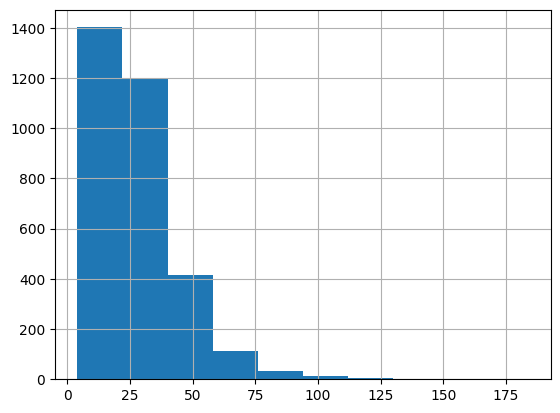

In [ ]:
df['Наименование закупки_x'].apply(lambda x: len(tokenizer.encode(x))).hist()

In [ ]:
tokenized_sample = tokenizer("Привет", 
                             truncation=True, 
                             max_length=128, 
                             padding='max_length'
                             )

In [ ]:
tokenizer.decode(tokenized_sample['input_ids'])

'[CLS] Привет [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
tokenized_sample

{'input_ids': [101, 77527, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
from datasets import Dataset

In [ ]:
data = Dataset.from_pandas(df)

In [ ]:
data = data.train_test_split(test_size=0.2)

In [ ]:
def tokenize_function(row):
    return tokenizer(row['Наименование закупки_x'], 
              truncation=True, 
              max_length=128, 
              padding='max_length')

In [ ]:
train = data['train'].map(tokenize_function, batched=True)
test = data['test'].map(tokenize_function, batched=True)

Map:   0%|          | 0/2548 [00:00<?, ? examples/s]

Map:   0%|          | 0/638 [00:00<?, ? examples/s]

In [ ]:
train = train.rename_column("sentiment", "label")
test = test.rename_column("sentiment", "label")

In [ ]:
training_args = TrainingArguments(output_dir="temp",
                                  evaluation_strategy="epoch",
                                  num_train_epochs=5,
                                  save_steps=200,
                                  per_device_eval_batch_size=64,
                                  per_device_train_batch_size=64,
                                  report_to='none')


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=train,
                  eval_dataset={"TRAIN":train, "VALID":test},
                #   compute_metrics=ServiceCategorizer.compute_metrics,
                #   custom_class_weight=self.class_weights
                  )

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Train Loss,Valid Loss
1,No log,No log,0.013826,0.318432
2,No log,No log,0.019078,0.274241
3,No log,No log,0.003023,0.275034
4,No log,No log,0.000955,0.298922
5,No log,No log,0.000897,0.306704


TrainOutput(global_step=200, training_loss=0.01660379409790039, metrics={'train_runtime': 104.4901, 'train_samples_per_second': 121.925, 'train_steps_per_second': 1.914, 'total_flos': 838008711321600.0, 'train_loss': 0.01660379409790039, 'epoch': 5.0})

In [ ]:
preds = trainer.predict(test)

In [ ]:
from torch.nn import Sigmoid
import torch

In [ ]:
test_probas = torch.sigmoid(torch.from_numpy(preds.predictions[:, 1]))

In [ ]:
test_labels = test_probas.numpy() > 0.5
test_labels = test_labels.tolist()

In [ ]:
print(m.classification_report(test['label'], test_labels))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       589
           1       0.76      0.63      0.69        49

    accuracy                           0.96       638
   macro avg       0.86      0.81      0.83       638
weighted avg       0.95      0.96      0.95       638



In [ ]:
### TO DO:
# изучить как прикрутить compute_metrics
# изучить как прокинуть class_weight в Trainer ***
# Попробовать в токенизатор прикрутить дополнительную текстовую информацию
# Изучить и применить BERTopic (это отдельная библиотека для кластеризации , очень наглядно)
# To be cont....